In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm


In [112]:
df = pd.read_csv('train.csv')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


/var/folders/gm/m9l1pg6x5sz8zkh4203cwkkm0000gn/T/ipykernel_5012/1735624824.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['satisfaction'].value_counts().index, fontsize = 20)


(np.float64(-1.1020791290045888),
 np.float64(1.143661934884653),
 np.float64(-1.3054028381083498),
 np.float64(1.1097800979435235))

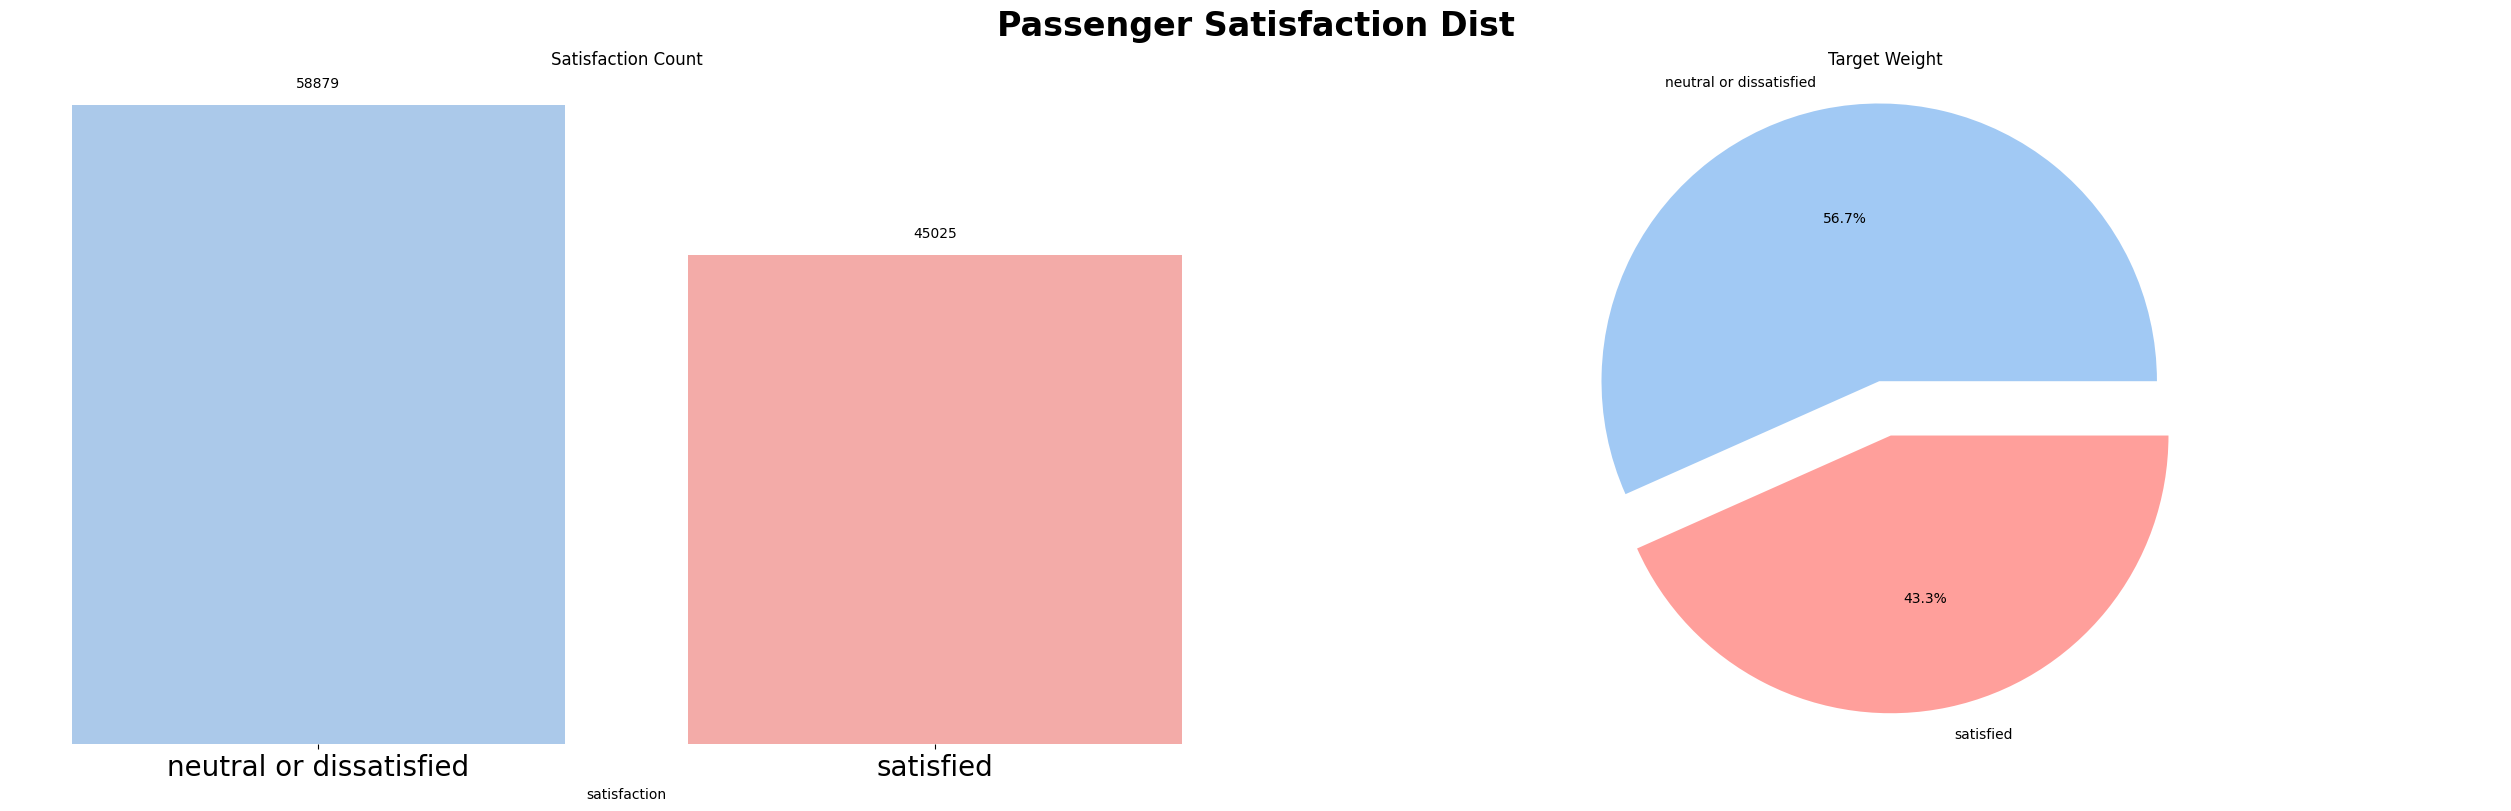

In [85]:
#Visualizing the data


fig = plt.figure(figsize=(25, 8), facecolor = 'white', layout = 'constrained')
fig.suptitle('Passenger Satisfaction Dist', weight = 'bold', fontsize = '24')
grid = gridspec.GridSpec(nrows = 1, ncols = 2, figure=fig)

#Creating first subplot
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')

#Seaborn --  Drawing countplot
plte_colors = ['#a1c9f4', '#ff9f9b']

sns.countplot(x = 'satisfaction', hue = 'satisfaction', data = df, ax=ax1, palette = plte_colors, legend = False)

#remove border of plot
for border in ax1.spines.values():
    border.set_visible(False)

#remove y-axis and show count
ax1.yaxis.set_visible(False)

for index,value in enumerate (df['satisfaction'].value_counts()):
    ax1.annotate(value, xy=(index,value+2000), ha = 'center', va = 'center')

#make the x-axis labels bigger
ax1.set_xticklabels(df['satisfaction'].value_counts().index, fontsize = 20)

#Second Subplot
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)

#Pie chart
ax2.pie(value,labels=label,autopct = '%1.1f%%', explode = (0,0.2), startangle = 360, colors = plte_colors)
ax2.axis('equal')
plt.show()

Text(0, 0.5, 'Number of Passengers')

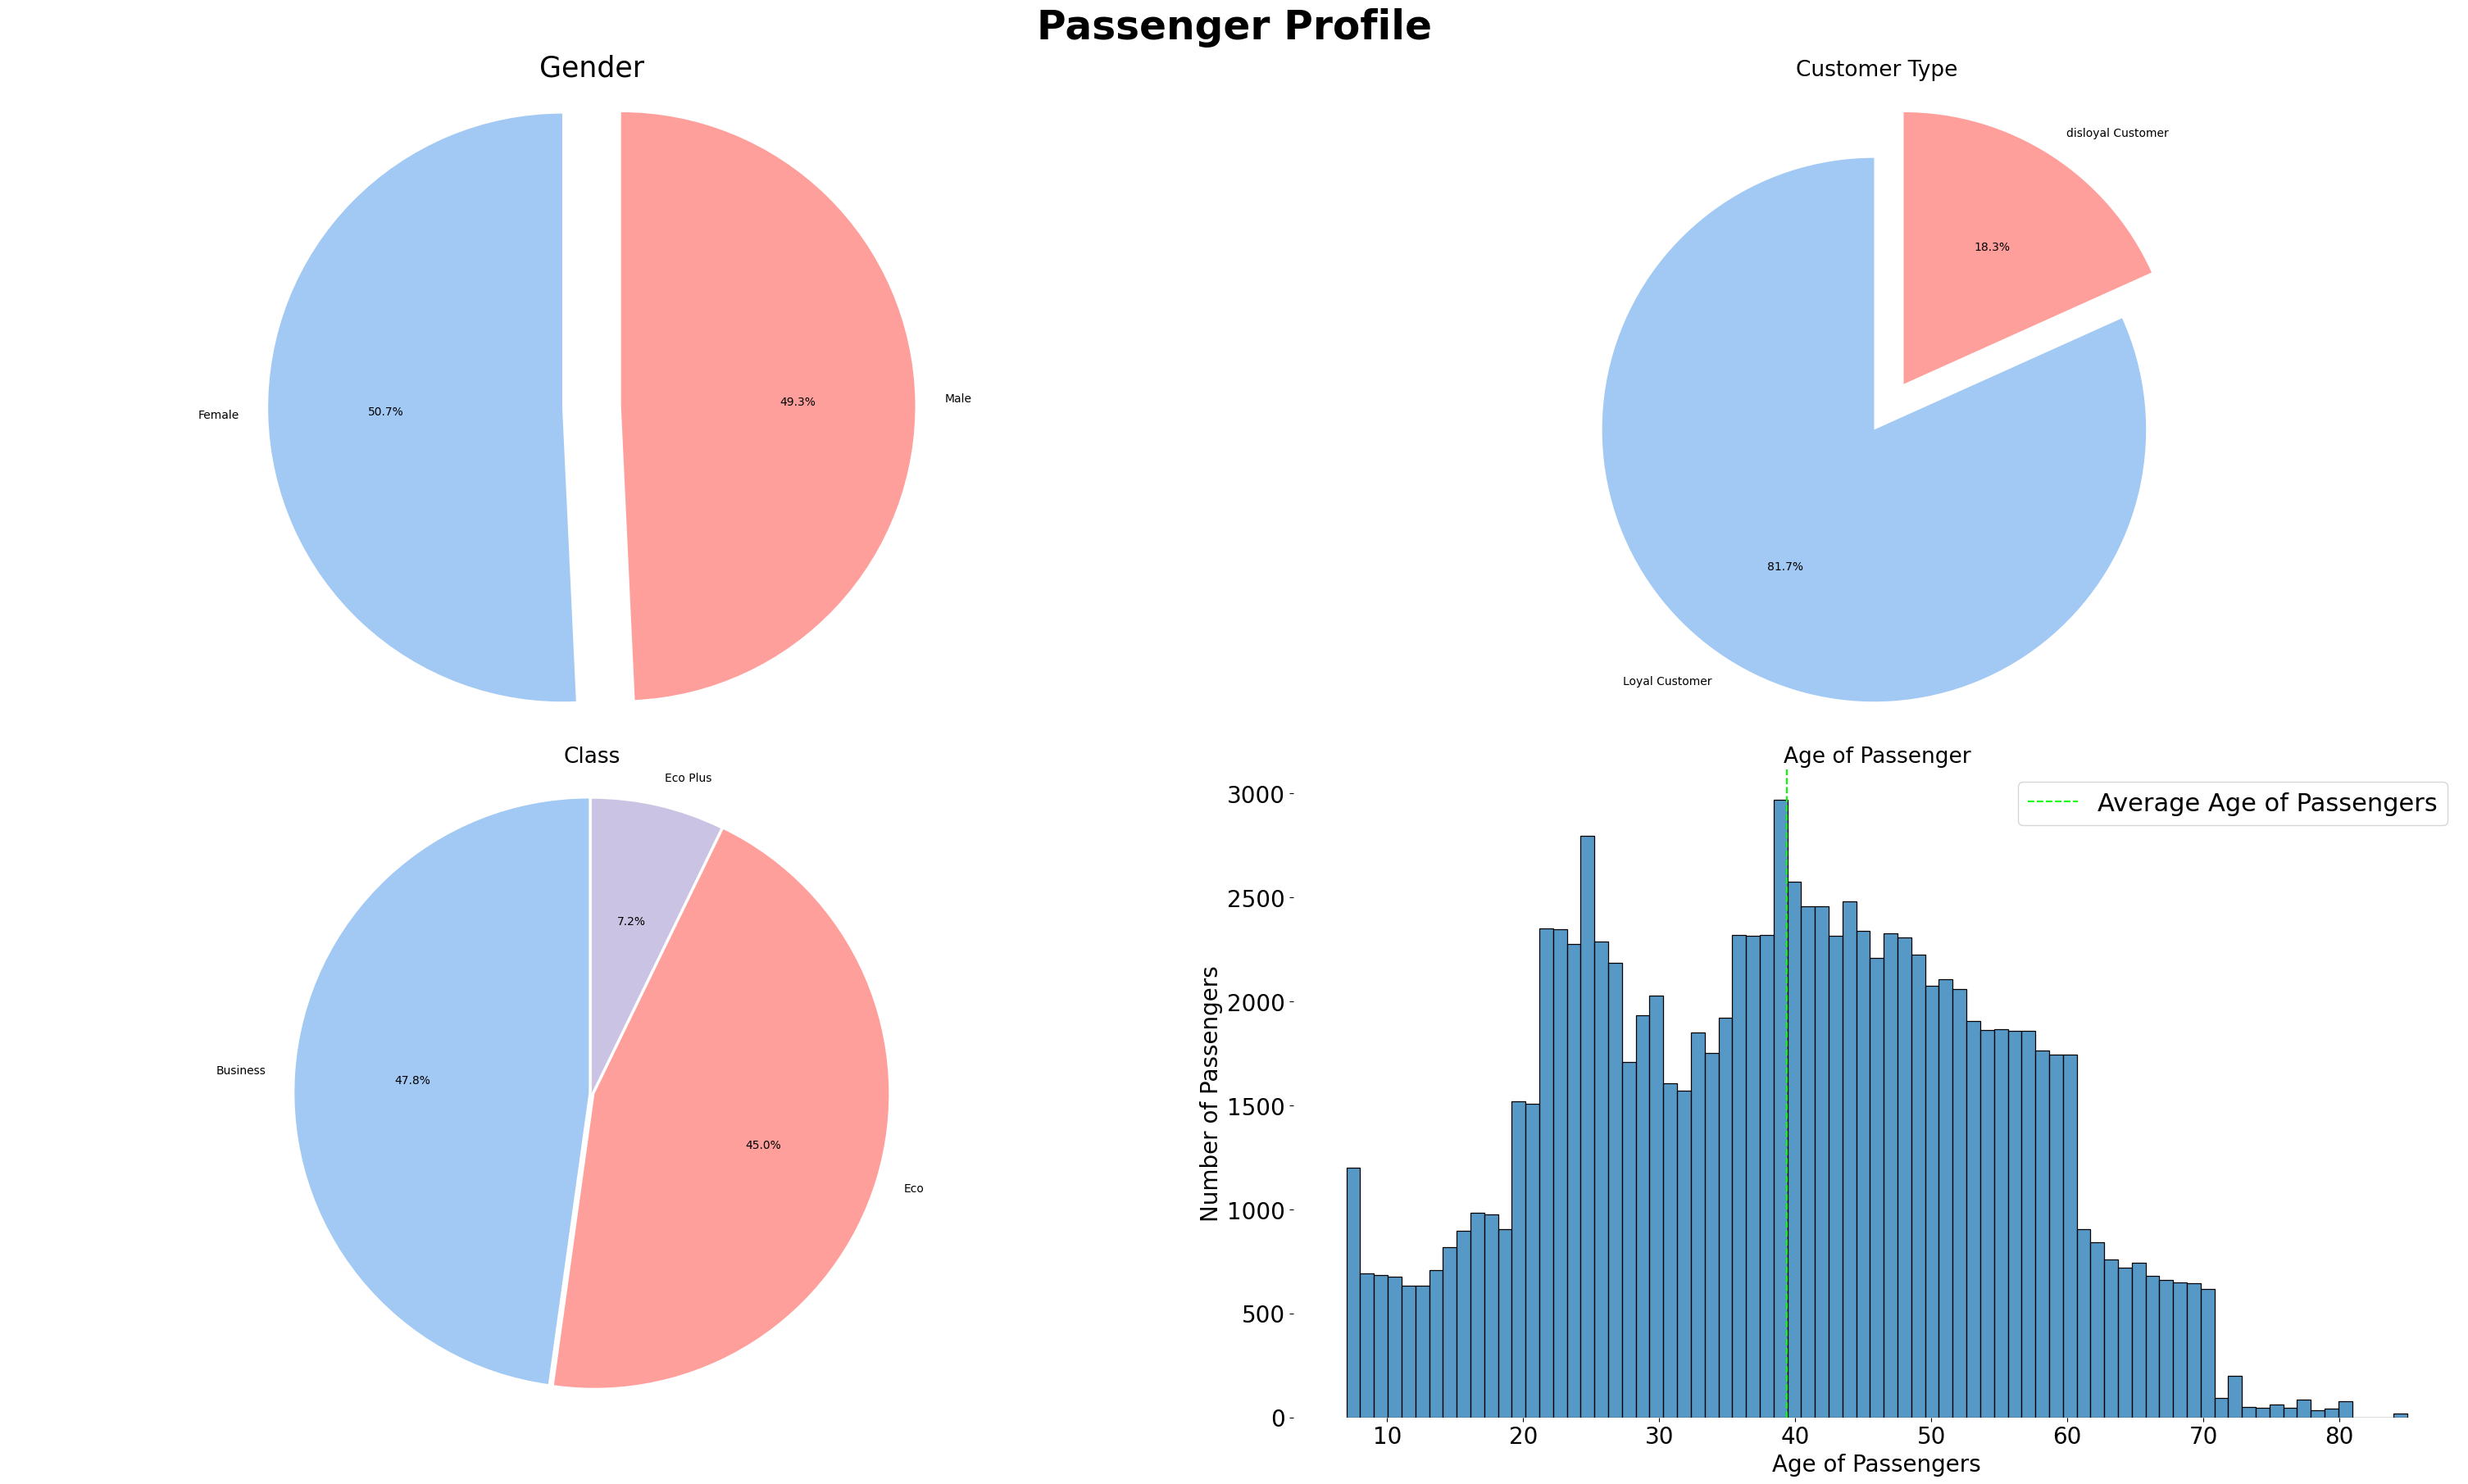

In [167]:
#Passenger Profile
    # Gender, Type of travel, class, age

fig = plt.figure(figsize=(30, 18), facecolor = 'white', layout = 'constrained')
fig.suptitle('Passenger Profile', weight = 'bold', fontsize = '35')
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure=fig)

#Creating first subplot -- Gender
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender', fontsize = 25)

label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)

#Pie chart
ax1.pie(value,labels=label,autopct = '%1.1f%%',  explode=(0, 0.2), startangle = 90, colors = plte_colors)
ax1.axis('equal')

# Customer type
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize = 19)

label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)

#Pie chart
ax2.pie(value,labels=label,autopct = '%1.1f%%',  explode=(0, 0.2), startangle = 90, colors = plte_colors)
ax2.axis('equal')

# Class
ax3 = fig.add_subplot(grid[1,0])
ax3.set_title('Class', fontsize = 19)

label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)

#Pie chart
ax3.pie(value,labels=label,autopct = '%1.1f%%', explode = (0.01, 0.01, 0), startangle = 90, colors = plte_colors+['#CBC3E3'])
ax3.axis('equal')

# Age
ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age of Passenger', fontsize = 19)

sns.histplot(df['Age'], ax=ax4, fill = True)

#remove spine
for border in ax4.spines.values():
    border.set_visible(False)

#mean line
ax4.axvline(df['Age'].mean(), linestyle = '--', color = '#00FF00', label = 'Average Age of Passengers')

#legend
ax4.legend(fontsize = 22)

#change tick size
ax4.tick_params(axis='x', labelsize = 20)
ax4.tick_params(axis='y', labelsize = 20)

#change x,y label

ax4.set_xlabel('Age of Passengers', fontsize = 20)
ax4.set_ylabel('Number of Passengers', fontsize = 20)

plt.show()

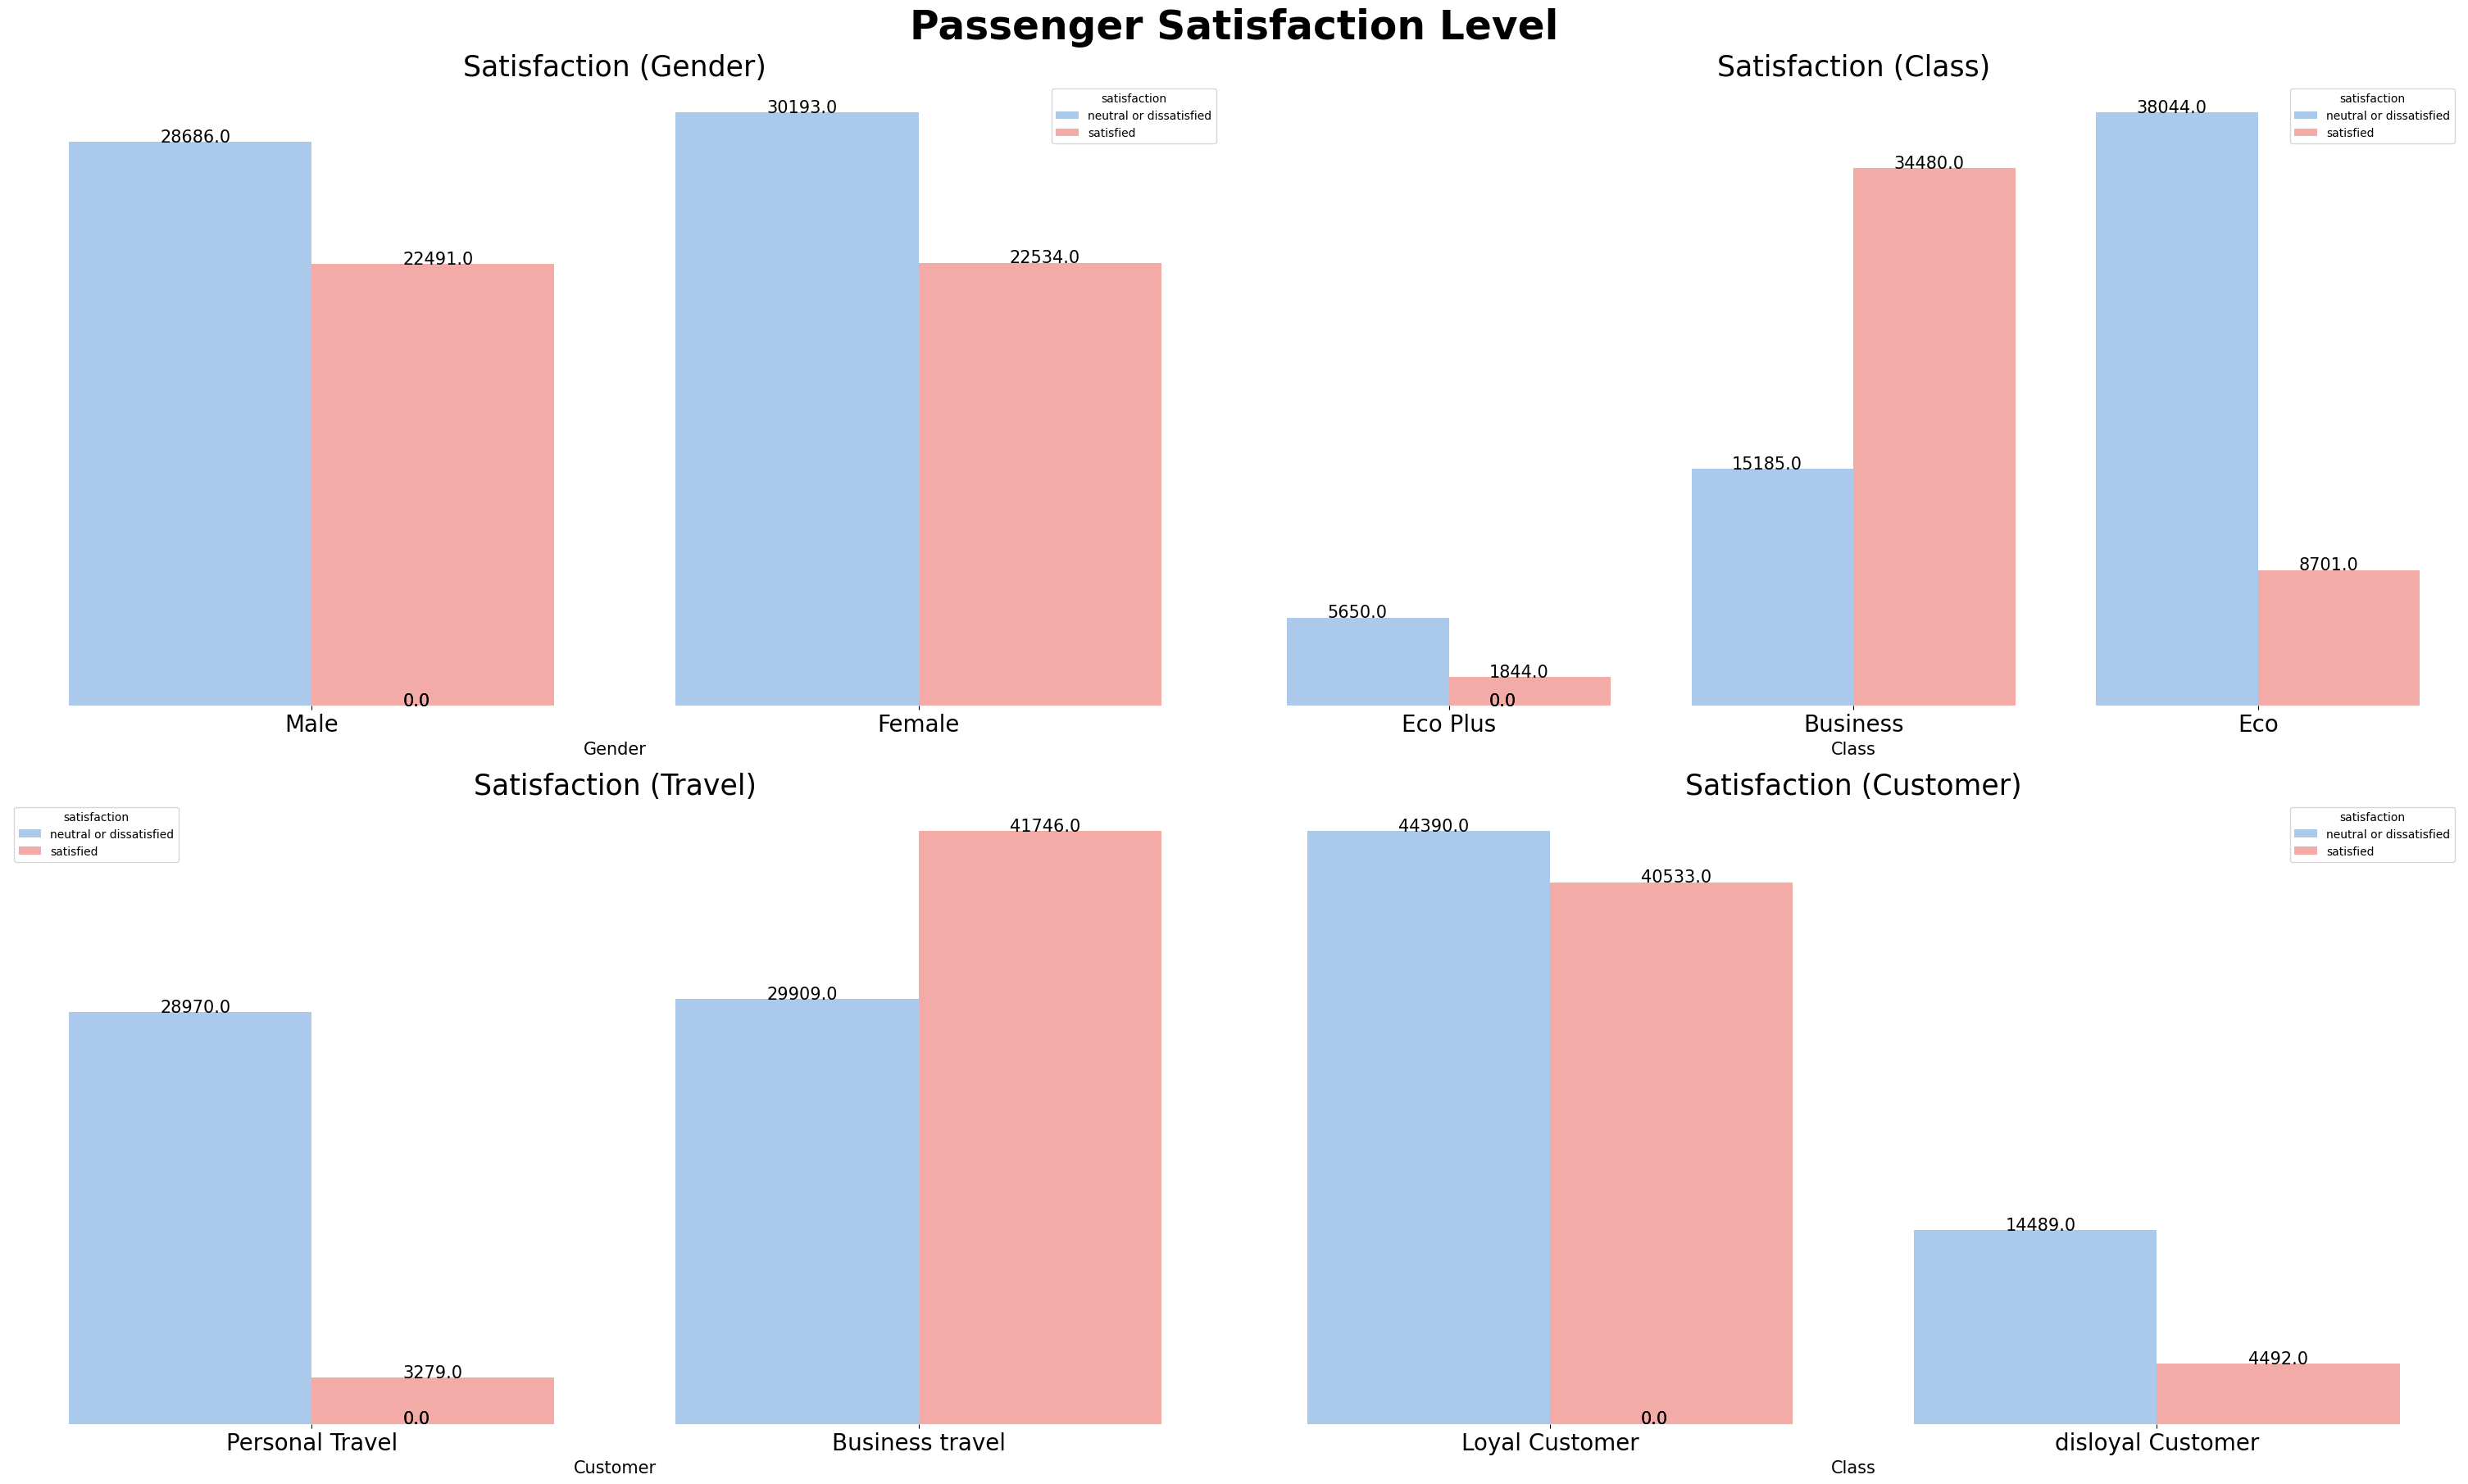

In [13]:
#Passenger Satisfaction based on:
    # Gender, Type of travel, class, age
df = pd.read_csv('train.csv')
plte_colors = ['#a1c9f4', '#ff9f9b']

fig = plt.figure(figsize=(30, 18), facecolor = 'white', layout = 'constrained')
fig.suptitle('Passenger Satisfaction Level', weight = 'bold', fontsize = '35')
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure=fig)

#Creating first subplot -- Gender
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction (Gender)', fontsize = 25)

sns.countplot(x=df['Gender'], hue = df['satisfaction'], ax=ax1, palette = plte_colors)

# Label the count on top of bar
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()), fontsize = 15)

#Get rid of y axis and border
ax1.get_yaxis().set_visible(False)
for border in ax1.spines.values():
    border.set_visible(False)
#Make xticks larger
ax1.tick_params(axis='x', labelsize = 20)
ax1.set_xlabel('Gender', fontsize = 15)

#Creating SECOND subplot -- Class
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Satisfaction (Class)', fontsize = 25)

sns.countplot(x=df['Class'], hue = df['satisfaction'], ax=ax2, palette = plte_colors)

# Label the count on top of bar
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.1, p.get_height()), fontsize = 15)

#Get rid of y axis and border
ax2.get_yaxis().set_visible(False)
for border in ax2.spines.values():
    border.set_visible(False)
#Make xticks larger
ax2.tick_params(axis='x', labelsize = 20)
ax2.set_xlabel('Class', fontsize = 15)

#Creating THIRD subplot -- Travel
ax3 = fig.add_subplot(grid[1,0])
ax3.set_title('Satisfaction (Travel)', fontsize = 25)

sns.countplot(x=df['Type of Travel'], hue = df['satisfaction'], ax=ax3, palette = plte_colors)

# Label the count on top of bar
for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()), fontsize = 15)

#Get rid of y axis and border
ax3.get_yaxis().set_visible(False)
for border in ax3.spines.values():
    border.set_visible(False)
#Make xticks larger
ax3.tick_params(axis='x', labelsize = 20)
ax3.set_xlabel('Type of Travel', fontsize = 15)

#Creating FOURTH subplot -- Customer
ax4 = fig.add_subplot(grid[1,1])
ax4.set_title('Satisfaction (Customer)', fontsize = 25)

sns.countplot(x=df['Customer Type'], hue = df['satisfaction'], ax=ax4, palette = plte_colors)

# Label the count on top of bar
for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()), fontsize = 15)

#Get rid of y axis and border
ax4.get_yaxis().set_visible(False)
for border in ax4.spines.values():
    border.set_visible(False)
#Make xticks larger
ax4.tick_params(axis='x', labelsize = 20)
ax4.set_xlabel('Customer', fontsize = 15)


plt.show()